# Sentdex

In this notebook, we'll take a look at Sentdex's *Sentiment* dataset, available through the [Quantopian partner program](https://www.quantopian.com/data). This dataset spans 2012 through the current day, and documents the mood of traders based on their messages.

## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href='#pipeline'><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.

### Free samples and limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

There is a *free* version of this dataset as well as a paid one. The free sample includes data until 2 months prior to the current date.

To access the most up-to-date values for this data set for trading a live algorithm (as with other partner sets), you need to purchase acess to the full set.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).

Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [1]:
# import the free sample of the dataset
from quantopian.interactive.data.sentdex import sentiment_free as dataset

# or if you want to import the full dataset, use:
# from quantopian.interactive.data.sentdex import sentiment

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.dshape

dshape("""var * {
  symbol: string,
  sentiment_signal: float64,
  sid: int64,
  asof_date: datetime,
  timestamp: datetime
  }""")

In [2]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset.count()

644635

In [3]:
# Let's see what the data looks like. We'll grab the first three rows.
dataset[:3]

,symbol,sentiment_signal,sid,asof_date,timestamp
0,AAPL,6,24,2012-10-15,2012-10-16
1,AAPL,2,24,2012-10-16,2012-10-17
2,AAPL,6,24,2012-10-17,2012-10-18


The Sentdex Sentiment data feed is elegant and simple. Just a few fields:

Let's go over the columns:
- **asof_date**: The date to which this data applies.
- **symbol**: stock ticker symbol of the affected company.
- **timestamp**: the datetime at which the data is available to the Quantopian system. For historical data loaded, we have simulated a lag. For data we have loaded since the advent of loading this data set, the timestamp is an actual recorded value.
- **sentiment_signal**: A standalone sentiment score from -3 to 6 for stocks
- **sid**: the equity's unique identifier. Use this instead of the symbol.

From the [Sentdex documentation](http://sentdex.com/blog/back-testing-sentdex-sentiment-analysis-signals-for-stocks):

```
The signals currently vary from -3 to a positive 6, where -3 is as equally strongly negative of sentiment as a 6 is strongly positive sentiment.

Sentiment signals:

6 - Strongest positive sentiment.
5 - Extremely strong, positive, sentiment.
4 - Very strong, positive, sentiment.
3 - Strong, positive sentiment.
2 - Substantially positive sentiment.
1 - Barely positive sentiment.
0 - Neutral sentiment
-1 - Sentiment trending into negatives.
-2 - Weak negative sentiment.
-3 - Strongest negative sentiment.
```

We've done much of the data processing for you. Fields like `timestamp` and `sid` are standardized across all our Store Datasets, so the datasets are easy to combine. We have standardized the `sid` across all our equity databases.

We can select columns and rows with ease. Below, we'll fetch all rows for Apple (sid 24) and explore the scores a bit with a chart.

(734791.0, 736078.0, -4, 7.5)

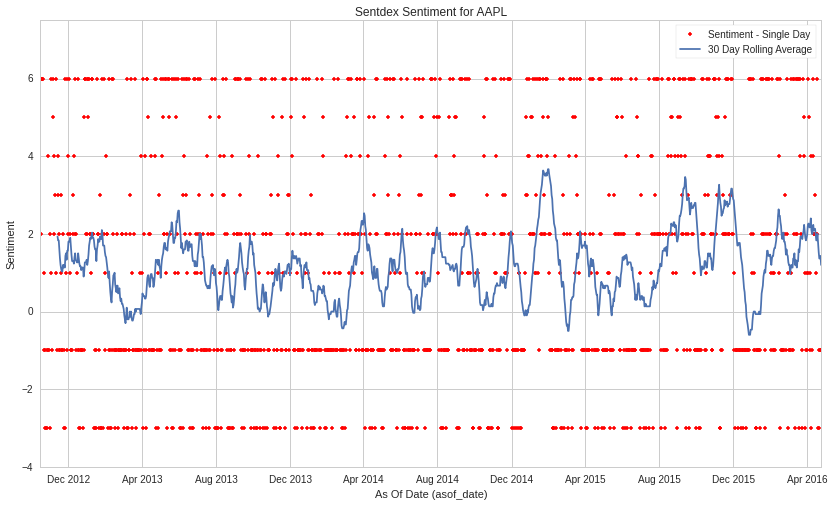

In [2]:
# Filtering for AAPL
aapl = dataset[dataset.sid == 24]
aapl_df = odo(aapl.sort('asof_date'), pd.DataFrame)
plt.plot(aapl_df.asof_date, aapl_df.sentiment_signal, marker='.', linestyle='None', color='r')
plt.plot(aapl_df.asof_date, pd.rolling_mean(aapl_df.sentiment_signal, 30))
plt.xlabel("As Of Date (asof_date)")
plt.ylabel("Sentiment")
plt.title("Sentdex Sentiment for AAPL")
plt.legend(["Sentiment - Single Day", "30 Day Rolling Average"], loc=1)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,7.5))

Let's check out Comcast's sentiment for fun

(734843.0, 736039.0, -4, 7.5)

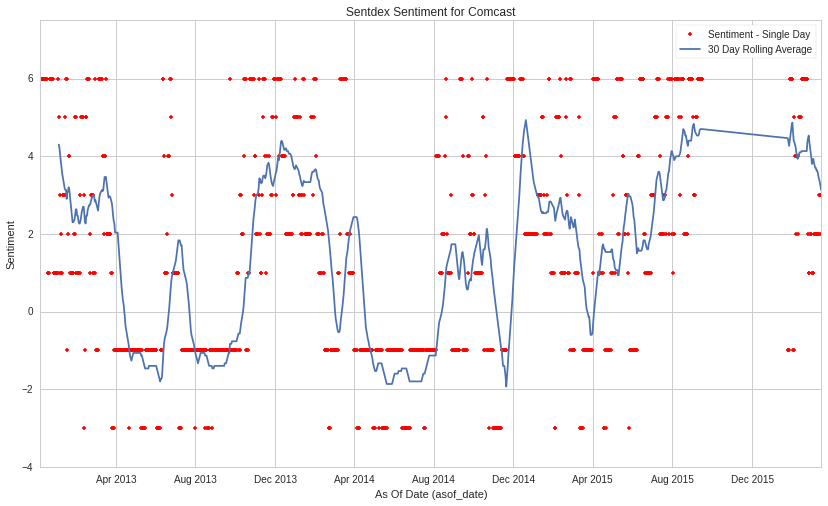

In [4]:
comcast = dataset[dataset.sid == 1637]
comcast_df = odo(comcast.sort('asof_date'), pd.DataFrame)
plt.plot(comcast_df.asof_date, comcast_df.sentiment_signal, marker='.', linestyle='None', color='r')
plt.plot(comcast_df.asof_date, pd.rolling_mean(comcast_df.sentiment_signal, 30))
plt.xlabel("As Of Date (asof_date)")
plt.ylabel("Sentiment")
plt.title("Sentdex Sentiment for Comcast")
plt.legend(["Sentiment - Single Day", "30 Day Rolling Average"], loc=1)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-4,7.5))

<a id='pipeline'></a>

#Pipeline Overview

### Accessing the data in your algorithms & research
The only method for accessing partner data within algorithms running on Quantopian is via the pipeline API. Different data sets work differently but in the case of this PsychSignal data, you can add this data to your pipeline as follows:

Import the data set
> `from quantopian.pipeline.data.sentdex import sentiment`

Then in intialize() you could do something simple like adding the raw value of one of the fields to your pipeline:
> `pipe.add(sentiment.sentiment_signal.latest, 'sentdex_sentiment')`

In [6]:
# Import necessary Pipeline modules
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import AverageDollarVolume

In [5]:
# For use in your algorithms
# Using the full paid dataset in your pipeline algo
# from quantopian.pipeline.data.sentdex import sentiment

# Using the free sample in your pipeline algo
from quantopian.pipeline.data.sentdex import sentiment_free

Now that we've imported the data, let's take a look at which fields are available for each dataset.

You'll find the dataset, the available fields, and the datatypes for each of those fields.

In [7]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

for data in (sentiment_free,):
    _print_fields(data)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: sentiment_free

Fields:
sentiment_signal - float64


---------------------------------------------------



Now that we know what fields we have access to, let's see what this data looks like when we run it through Pipeline.


This is constructed the same way as you would in the backtester. For more information on using Pipeline in Research view this thread:
https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

In [28]:
# Let's see what this data looks like when we run it through Pipeline
# This is constructed the same way as you would in the backtester. For more information
# on using Pipeline in Research view this thread:
# https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters
pipe = Pipeline()
       
pipe.add(sentiment_free.sentiment_signal.latest, 'sentiment_signal')

In [29]:
# Setting some basic liquidity strings (just for good habit)
dollar_volume = AverageDollarVolume(window_length=20)
top_1000_most_liquid = dollar_volume.rank(ascending=False) < 1000

pipe.set_screen(top_1000_most_liquid & sentiment_free.sentiment_signal.latest.notnan())

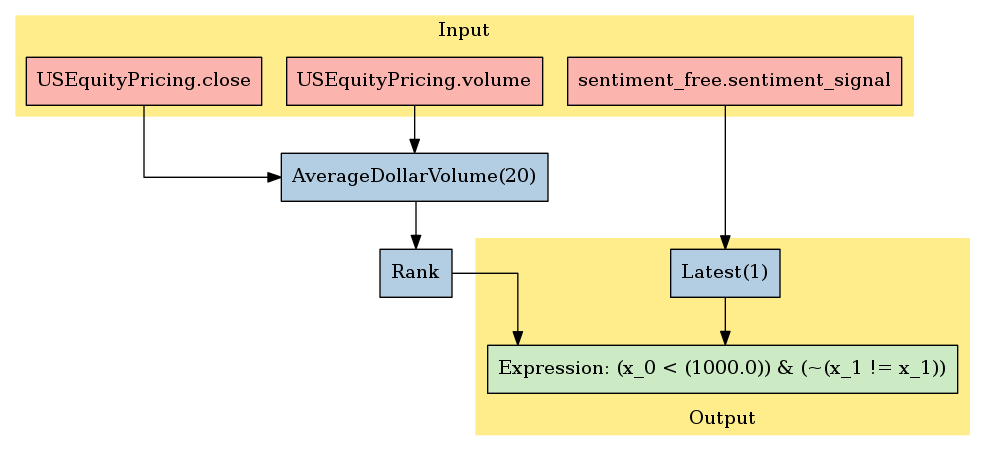

In [30]:
# The show_graph() method of pipeline objects produces a graph to show how it is being calculated.
pipe.show_graph(format='png')

In [31]:
# run_pipeline will show the output of your pipeline
pipe_output = run_pipeline(pipe, start_date='2013-11-01', end_date='2013-11-25')
pipe_output

sentiment_signal
2013-11-01 00:00:00+00:00 Equity(2 [AA])                        -1
                          Equity(24 [AAPL])                      3
                          Equity(62 [ABT])                       1
                          Equity(67 [ADSK])                      2
                          Equity(76 [TAP])                       5
                          Equity(88 [ACI])                      -3
                          Equity(114 [ADBE])                    -3
                          Equity(122 [ADI])                      2
                          Equity(128 [ADM])                      1
                          Equity(161 [AEP])                     -1
                          Equity(166 [AES])                      5
                          Equity(168 [AET])                      6
                          Equity(185 [AFL])                      5
                          Equity(216 [HES])                      4
                          Equity(239 [AIG])                     -1
                          Equity(328 [ALTR])                     2
                          Equity(337 [AMAT])                    -1
                          Equity(338 [BEAM])                     3
                          Equity(351 [AMD])                      3
                          Equity(357 [TWX])                     -1
                          Equity(368 [AMGN])                     3
                          Equity(410 [AN])                       1
                          Equity(438 [AON])                      6
                          Equity(448 [APA])                     -1
                          Equity(455 [APC])                     -1
                          Equity(460 [APD])                      6
                          Equity(465 [APH])                      5
                          Equity(510 [ARG])                      6
                          Equity(630 [ADP])                     -3
                          Equity(660 [AVP])                      1
...                                                            ...
2013-11-25 00:00:00+00:00 Equity(36346 [LO])                     2
                          Equity(36372 [SNI])                    3
                          Equity(36930 [DISC_A])                 2
                          Equity(38084 [MJN])                   -1
                          Equity(38691 [CFN])                    6
                          Equity(38936 [DG])                     6
                          Equity(39546 [LYB])                   -1
                          Equity(39778 [QEP])                    4
                          Equity(39840 [TSLA])                   4
                          Equity(40430 [GM])                     2
                          Equity(40852 [KMI])                   -1
                          Equity(41451 [LNKD])                  -1
                          Equity(41462 [MOS])                   -1
                          Equity(41579 [P])                      2
                          Equity(41636 [MPC])                   -1
                          Equity(42023 [XYL])                   -1
                          Equity(42118 [GRPN])                   2
                          Equity(42173 [DLPH])                   3
                          Equity(42230 [TRIP])                   6
                          Equity(42251 [WPX])                   -1
                          Equity(42270 [KORS])                   2
                          Equity(42277 [ZNGA])                   6
                          Equity(42788 [PSX])                    5
                          Equity(42950 [FB])                     5
                          Equity(43399 [ADT])                    6
                          Equity(43405 [KRFT])                   3
                          Equity(43694 [ABBV])                   3
                          Equity(43721 [SCTY])                   2
                          Equi

Taking what we've seen from above, let's see how we'd move that into the backtester.

In [11]:
# This section is only importable in the backtester
from quantopian.algorithm import attach_pipeline, pipeline_output

# General pipeline imports
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import AverageDollarVolume

# Import the datasets available
# For use in your algorithms
# Using the full paid dataset in your pipeline algo
# from quantopian.pipeline.data.sentdex import sentiment

# Using the free sample in your pipeline algo
from quantopian.pipeline.data.sentdex import sentiment_free

def make_pipeline():
    # Create our pipeline
    pipe = Pipeline()
    
    # Screen out penny stocks and low liquidity securities.
    dollar_volume = AverageDollarVolume(window_length=20)
    is_liquid = dollar_volume.rank(ascending=False) < 1000
    
    # Create the mask that we will use for our percentile methods.
    base_universe = (is_liquid)

    # Add pipeline factors
    pipe.add(sentiment_free.sentiment_signal.latest, 'sentiment_signal')

    # Set our pipeline screens
    pipe.set_screen(is_liquid)
    return pipe

def initialize(context):
    attach_pipeline(make_pipeline(), "pipeline")
    
def before_trading_start(context, data):
    results = pipeline_output('pipeline')

Now you can take that and begin to use it as a building block for your algorithms, for more examples on how to do that you can visit our <a href='https://www.quantopian.com/posts/pipeline-factor-library-for-data'>data pipeline factor library</a>